In [46]:
import os

#from google.colab import drive
##drive.mount('/content/drive')

##file_path = '/content/drive/MyDrive/ML_F24_Team_Project/Dataset4/Tabular_Dataset/US_Accidents_March23.csv'
file_path = '/Users/narasimhamurthy/Desktop/Neha/Rutgers/Projects/ML/Classifier_USAcc/US_Accidents_March23.csv'

In [76]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install imblearn

# (a) Brief Exploration of Dataset

In [49]:
import numpy as np
import pandas as pd
from scipy import stats as sps
from matplotlib import pyplot as plt


In [50]:
#Read CSV file
df = pd.read_csv((file_path))
#display the first 20 rows of the dataset
(df.head(20))



,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [51]:
# Number of samples
num_samples = df.shape[0]
print('The number of samples is ', num_samples)

The number of samples is  7728394


In [52]:
df.dropna(subset=['Severity'], inplace=True)

In [53]:
result = df.groupby('Severity').count()

print(result)

               ID   Source  Start_Time  End_Time  Start_Lat  Start_Lng  \
Severity                                                                 
1           67366    67366       67366     67366      67366      67366   
2         6156981  6156981     6156981   6156981    6156981    6156981   
3         1299337  1299337     1299337   1299337    1299337    1299337   
4          204710   204710      204710    204710     204710     204710   

          End_Lat  End_Lng  Distance(mi)  Description  ...  Roundabout  \
Severity                                               ...               
1           28206    28206         67366        67366  ...       67366   
2         3945613  3945613       6156981      6156978  ...     6156981   
3          161528   161528       1299337      1299335  ...     1299337   
4          190285   190285        204710       204710  ...      204710   

          Station     Stop  Traffic_Calming  Traffic_Signal  Turning_Loop  \
Severity                         

In [54]:
dfSev1 = df.loc[df['Severity']== 1].sample(frac=1)
dfSev2 = df.loc[df['Severity']== 2].sample(frac=0.15)
dfSev3 = df.loc[df['Severity']== 3].sample(frac=0.3)
dfSev4 = df.loc[df['Severity']== 4].sample(frac=1)
print(len(dfSev1))
print(len(dfSev2))
print(len(dfSev3))
print(len(dfSev4))

67366
923547
389801
204710


Due to the highly imbalance in the data, I decided to undersample some of the data in the two big classes in order for a better representation.

For severity 1, we are taking all of the instances (100%) of the data.

For severity 2, we are undersampling the data as we are only selecting 15% of the instances. This is a significant reduction compared to the total number of instances of Severity 2, but this will help balance the dataset since Severity 2 has much more samples than the other classes.

For severity 3, we are also undersampling and selecting only 30% of the instances.

For severity 4, we are keeping all of the instances of Severity 4



**Reason Why We Are Undersampling**

1. Imbalanced Dataset: Since Severity 2 and 3 are overrepresented, undersample them will balance the class distributions. The large portion of data that severity 2 and 3 has could bias the model towards predicting that class.

      When I was first creating the model, I noticed this exact think happening where the model correctly predicted for class 2 and 3, however, for class 1 and 4 it predicted incorrectly. Actual class 1 samples were predicted as class 2 and actual class 4 samples were predicted as class 3 as class 1 and 4 doesn't have many samples to train with, so it would predict the two large classes.

With undersampling, the model has an equal oppurtunity to learn from each of the classes which would improve the precision, recall, and F1 score for the minority classes

In [56]:
#combines all the data and sees how many samples are between these four classes
df = pd.concat([dfSev1, dfSev2, dfSev3, dfSev4], ignore_index=True)
len(df)

1585424

In [57]:
#check the total amount of samples that exists
df.shape[0]

1585424

In [58]:
# Number of samples
num_samples = df.shape[0]
print('The number of samples is ', num_samples)


The number of samples is  1585424


In [59]:
# Number of raw features
num_features = df.shape[1]
print('The number of raw features is ', num_features)

The number of raw features is  46


In [60]:
target = "Severity"

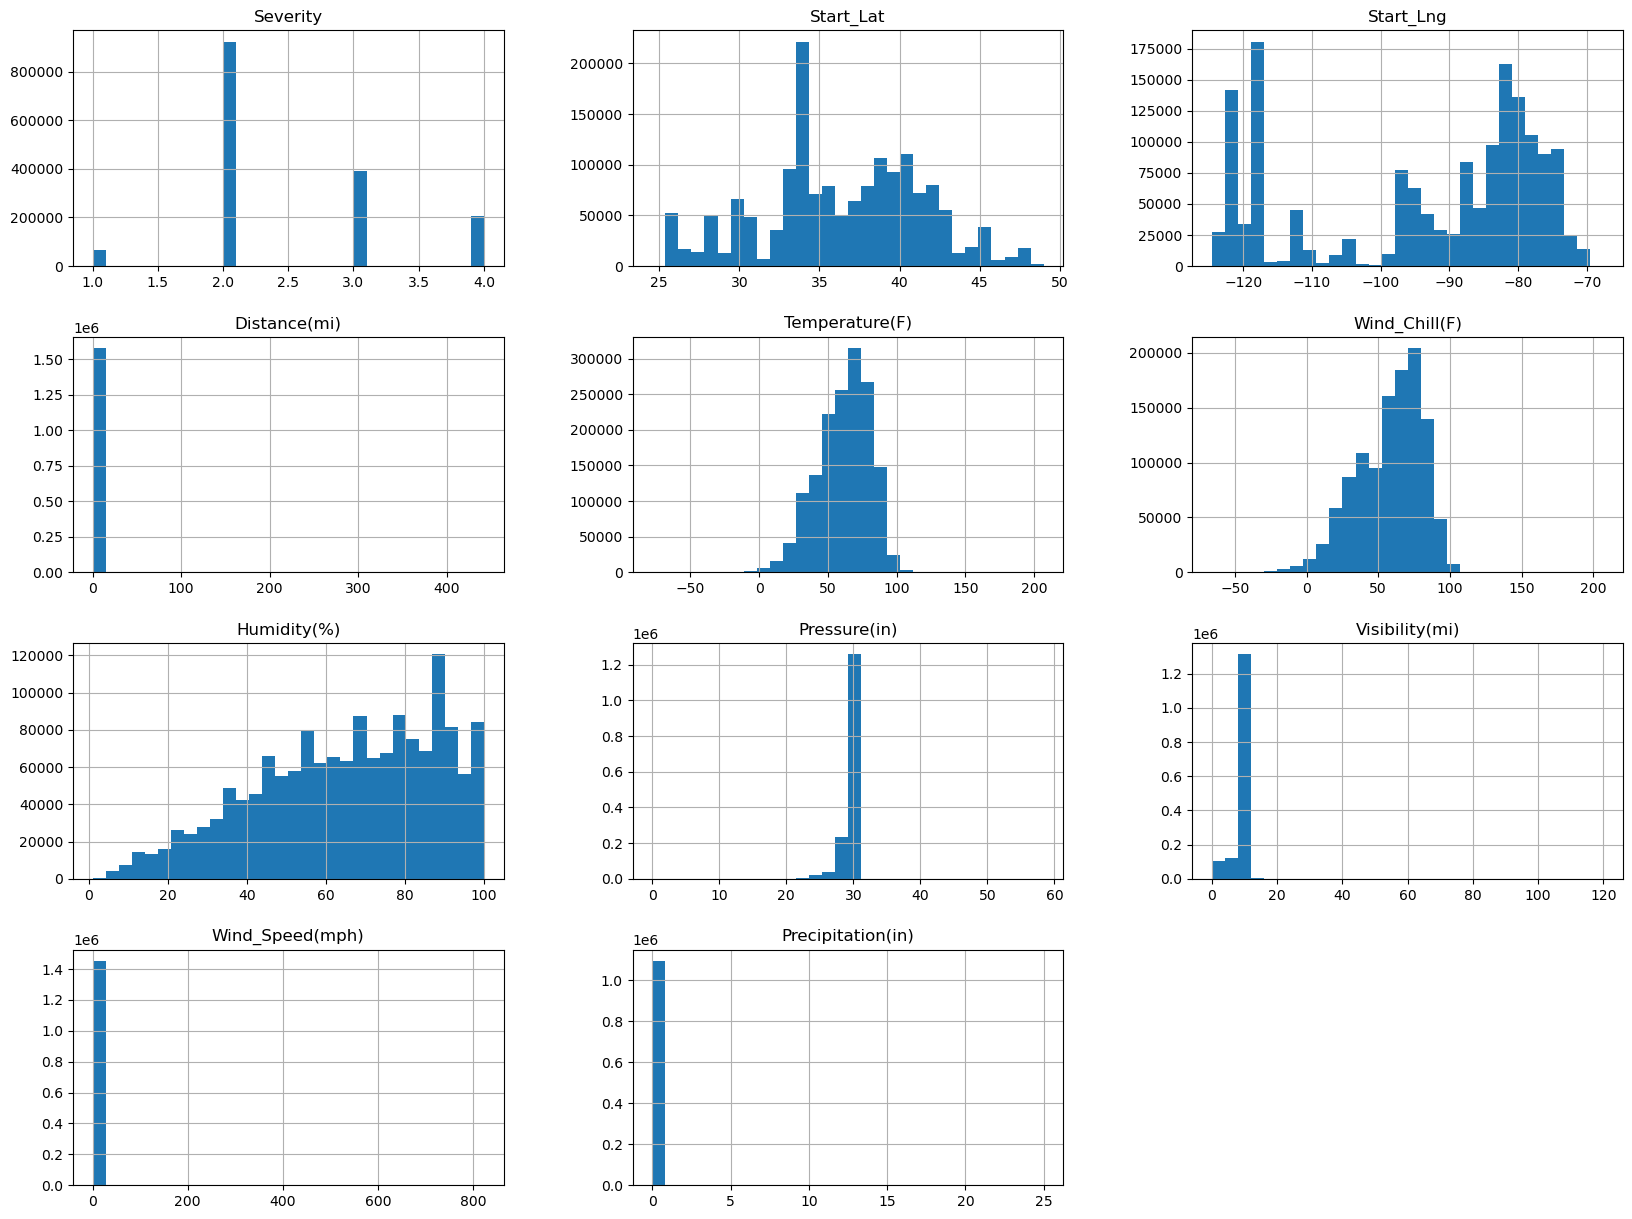

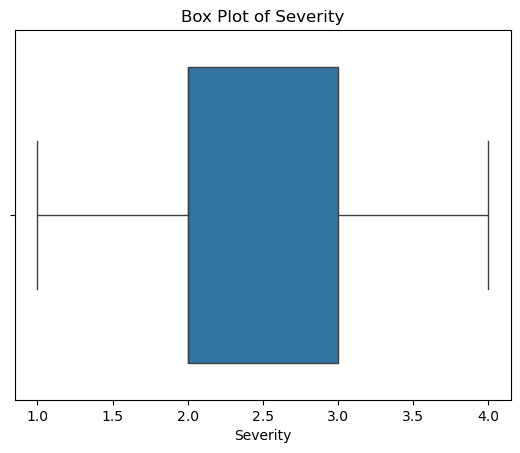

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plot Everything on Bar graph excepts End_Lat and End_Lng

# Exclude 'End_Lat' and 'End_Lng' from the histogram plot
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
columns_to_exclude = ['End_Lat', 'End_Lng']
filtered_columns = [col for col in numeric_columns if col not in columns_to_exclude]

# Plot histograms for the filtered columns
df[filtered_columns].hist(bins=30, figsize=(20, 15))
plt.show()

# Box plot for the 'Severity' variable
sns.boxplot(x='Severity', data=df)
plt.title("Box Plot of Severity")
plt.show()


Severity
2    923547
3    389801
4    204710
1     67366
Name: count, dtype: int64


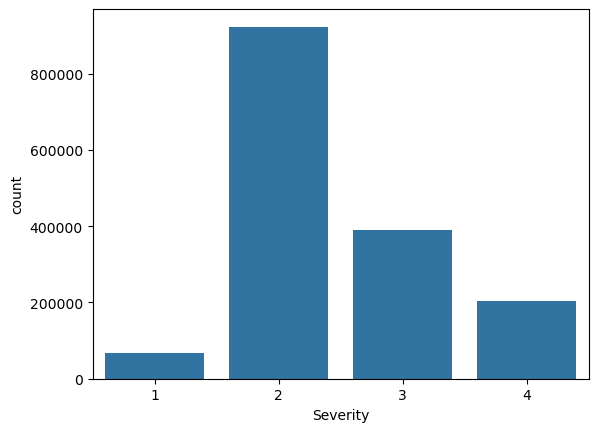

In [62]:
# Plot distribution of Severity
sns.countplot(x='Severity', data=df)
print(df['Severity'].value_counts())
plt.show()


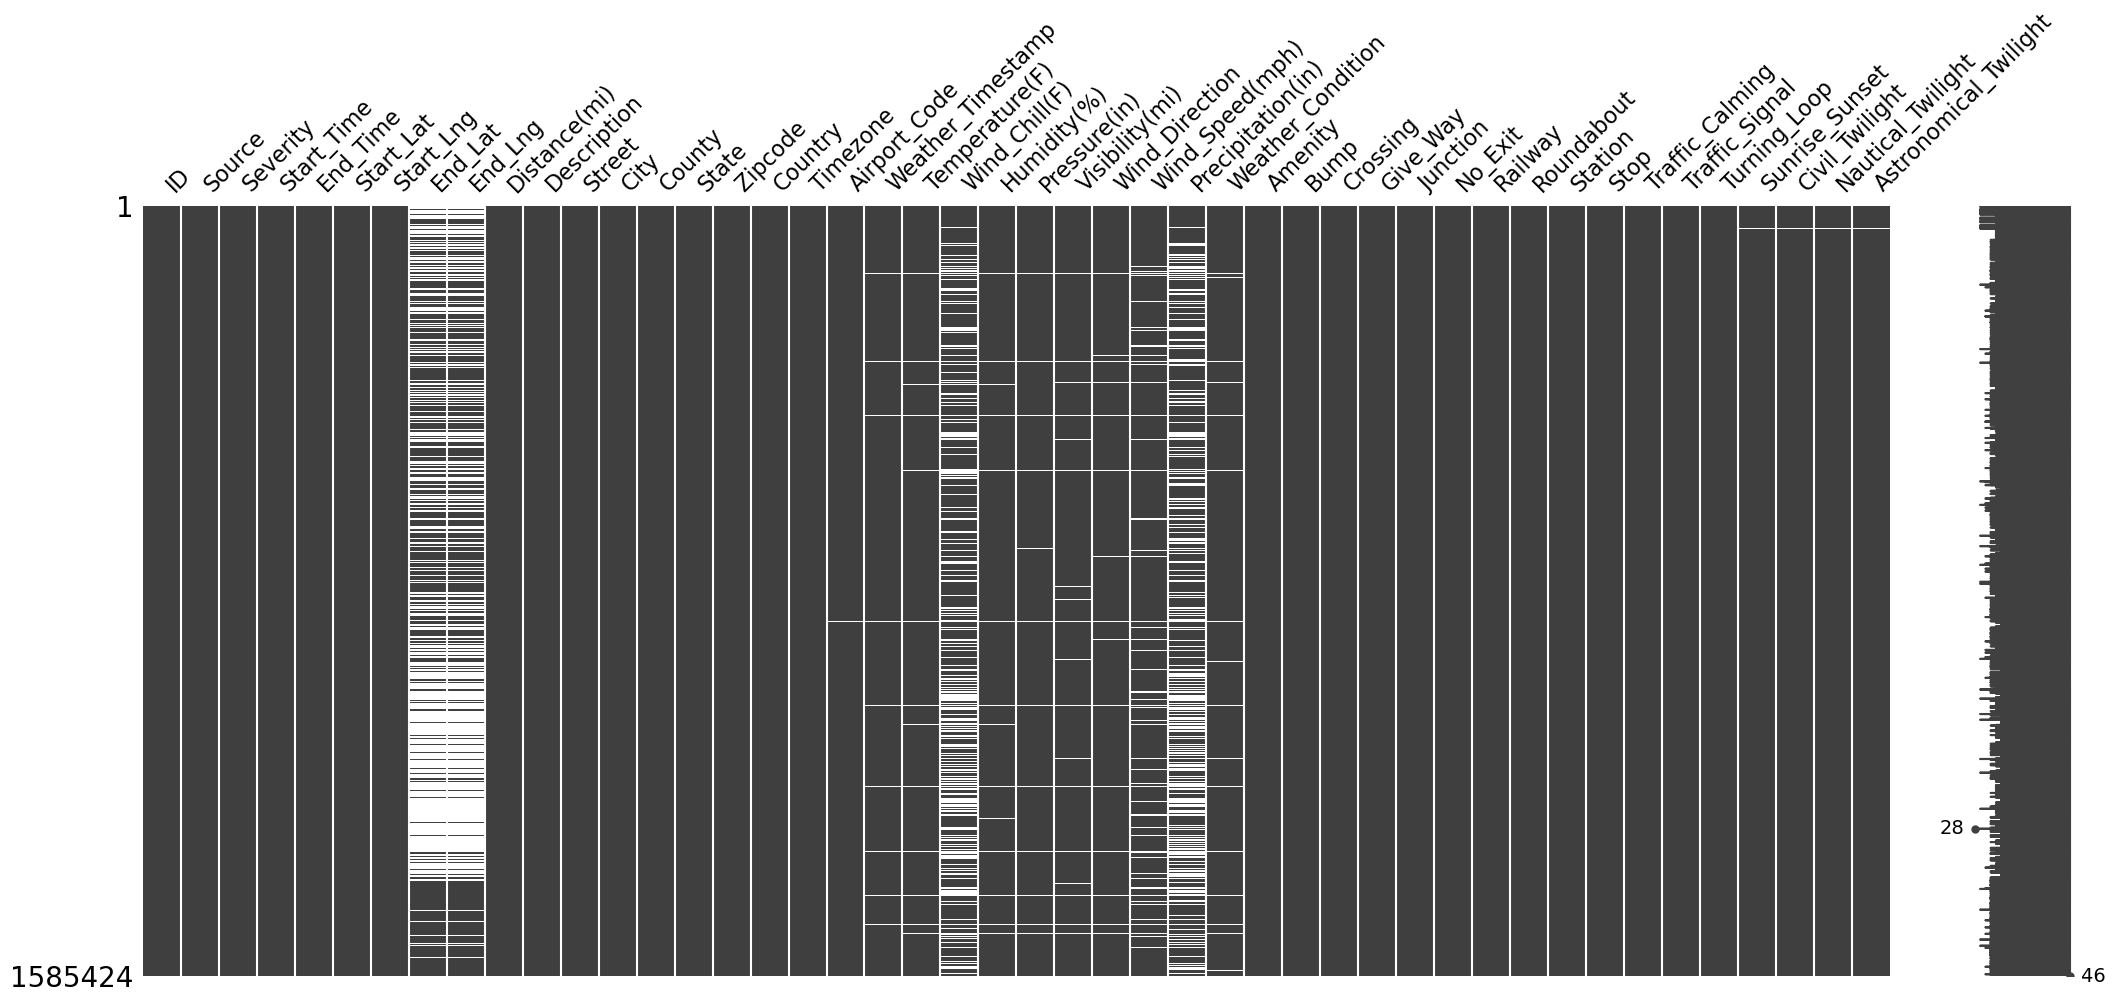

In [78]:
# Demonstrates missing values (Visualize the entire data)
#Each column is the feature and each row is the data sample.
#Each row that shows a white space means that there is missing value in that spot
import missingno as msno
msno.matrix(df)
plt.show()


Above is a visual of all the data which is displayed in gray, and any place with white means that there is missing data. In this case, we can see that the two features, "End_Lng" and "End_Lat" have no data. We can also see in some of the features, there are some rows that have no data for that particular feature

In [80]:
missing_values = df.isnull().sum()
missing_fraction = missing_values / num_samples * 100
print(f"\nMissing Values (in %):\n{missing_fraction[missing_fraction > 0]}")


Missing Values (in %):
End_Lat                  45.844519
End_Lng                  45.844519
Street                    0.145639
City                      0.003469
Zipcode                   0.028257
Timezone                  0.092783
Airport_Code              0.309949
Weather_Timestamp         1.619441
Temperature(F)            2.226471
Wind_Chill(F)            27.903640
Humidity(%)               2.359432
Pressure(in)              1.910530
Visibility(mi)            2.418281
Wind_Direction            2.317109
Wind_Speed(mph)           8.037534
Precipitation(in)        30.829671
Weather_Condition         2.386806
Sunrise_Sunset            0.362679
Civil_Twilight            0.362679
Nautical_Twilight         0.362679
Astronomical_Twilight     0.362679
dtype: float64


Above, I calculated the percentage of data that is missing in the many samples we are using

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Checking for Duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")



Number of Duplicate Rows: 0


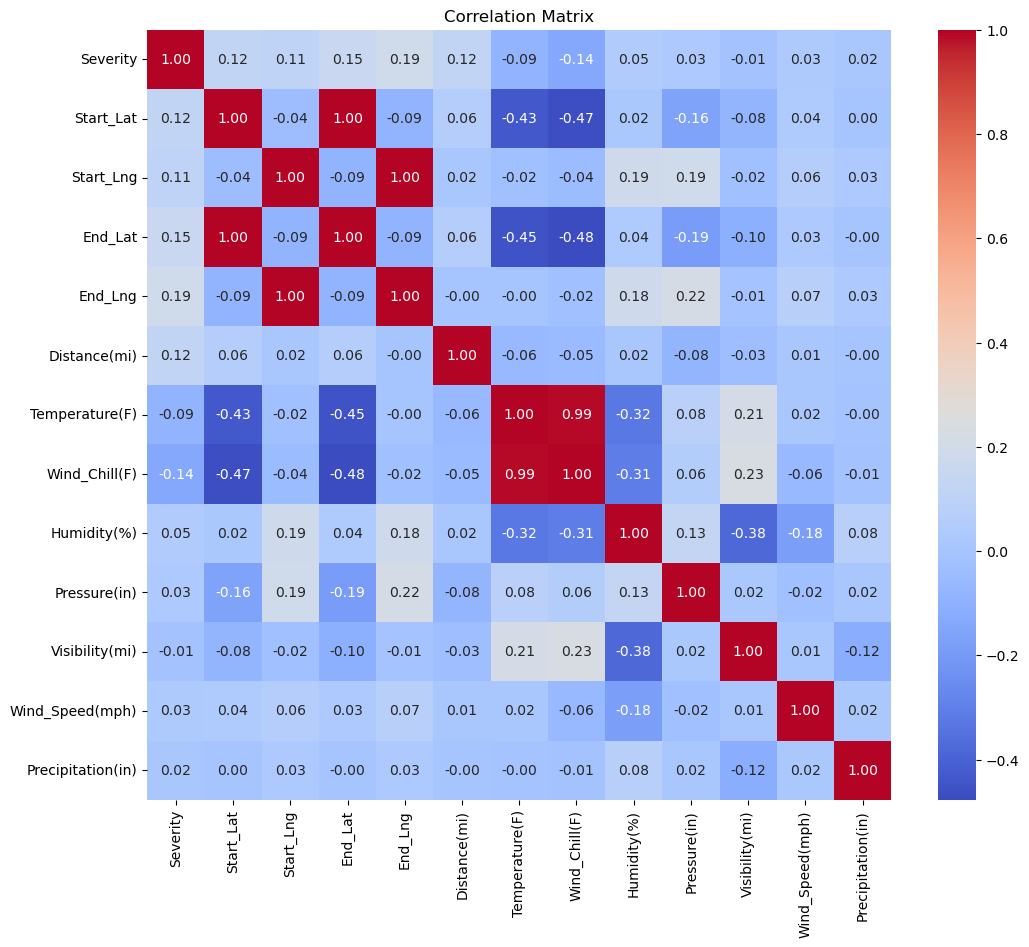

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

We created a correlation matrix and incorporated a heatmap with that. This gives a detailed overview of the relationships between the numerical variables in the datasets.

**Correlation Matrix**

Correlation Coefficients:
The coefficents range between -1 and 1, which represent the strength and the direction of the relationship.

+1: this means that there is a positive correlation --> as one variable increased, the other will also increase proportionally.

-1: this means that there is a negative correlation --> as one variable decreases, the other will decrease proportionally.

0: this means that there is no linear correlation between the variables.

The diagonals of the matrix will always be 1 because any variables is perfectly correlated with itself.

It will also be symmetric because the correlation between Variable A and B is the same as the correlation between Variable B and A


**Heatmap**

The color gradient and intensity represents the corrrelation coefficients.

- The red (warm colors) demonstrates that there is a positive correlation
- The blue (cool colors) demonstrates that there is a negative correlation

/var/folders/tf/bq9kbjld3bnd3lfs7pjlt9hc0000gn/T/ipykernel_1344/1300604406.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Missing_Count', y='City_State', data=top_missing_counts, palette='coolwarm')


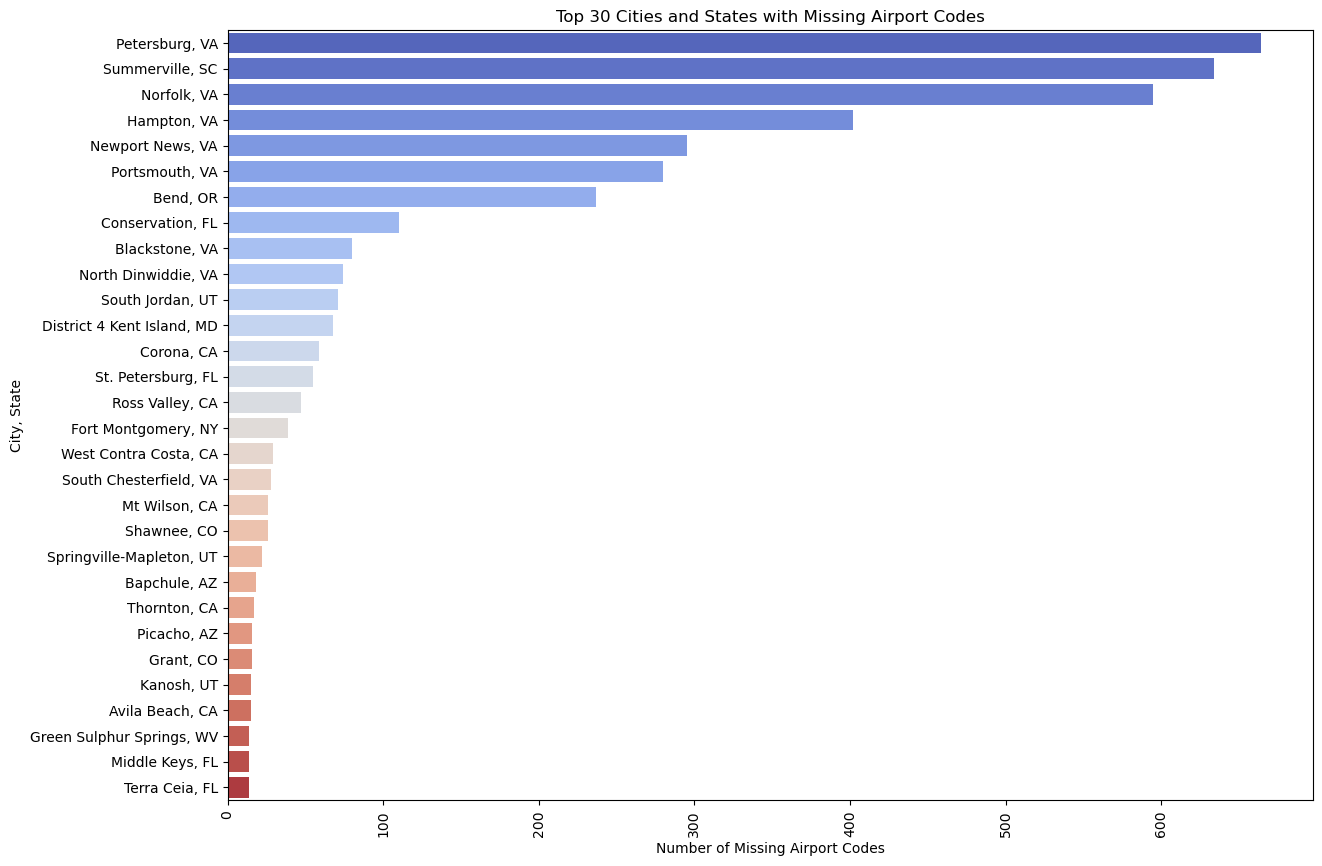

In [85]:
#Find Cities, State where Airport Codes are missing (show as a graph)
import matplotlib.pyplot as plt
import seaborn as sns

# Filter rows where Airport_Code is missing
missing_airport_data = df[df['Airport_Code'].isnull()]

# Group by City and State to count the occurrences of missing airport codes
missing_counts = missing_airport_data.groupby(['City', 'State']).size().reset_index(name='Missing_Count')

# Combine City and State into a single column for better labeling in the plot
missing_counts['City_State'] = missing_counts['City'] + ', ' + missing_counts['State']

# Sort by the number of missing airport codes in descending order and get the top 30
top_missing_counts = missing_counts.sort_values(by='Missing_Count', ascending=False).head(30)

# Plotting the data
plt.figure(figsize=(14, 10))  # Set the size of the plot
sns.barplot(x='Missing_Count', y='City_State', data=top_missing_counts, palette='coolwarm')
plt.title("Top 30 Cities and States with Missing Airport Codes")
plt.xlabel("Number of Missing Airport Codes")
plt.ylabel("City, State")
plt.xticks(rotation=90)
plt.show()



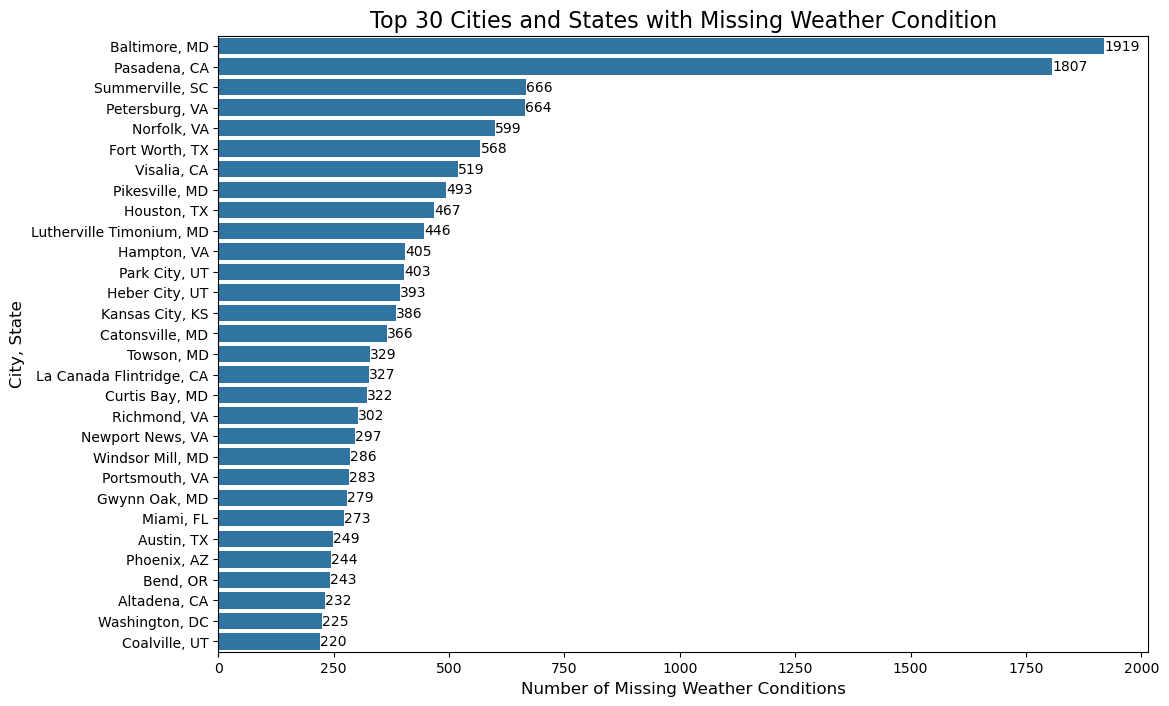

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the missing values in the 'Weather_Condition' column for each City and State
missing_weather_condition = df[df['Weather_Condition'].isnull()].groupby(['City', 'State']).size().reset_index(name='Missing_Weather_Condition_Count')

# Sort by the count of missing values in descending order and get top 30
missing_weather_condition_sorted = missing_weather_condition.sort_values(by='Missing_Weather_Condition_Count', ascending=False).head(30)

# Plot the bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x='Missing_Weather_Condition_Count', y=missing_weather_condition_sorted['City'] + ', ' + missing_weather_condition_sorted['State'], data=missing_weather_condition_sorted)

# Add the counts on top of the bars
for index, value in enumerate(missing_weather_condition_sorted['Missing_Weather_Condition_Count']):
    plt.text(value, index, str(value), color='black', ha="left", va="center")

# Title and labels
plt.title('Top 30 Cities and States with Missing Weather Condition', fontsize=16)
plt.xlabel('Number of Missing Weather Conditions', fontsize=12)
plt.ylabel('City, State', fontsize=12)

plt.show()


# (b) Pre-Processing

In [88]:
# Columns to drop
#Dropping End_lat and End_lng because we see that 100% of the data is missing
columns_to_drop = ['Source', 'ID', 'End_Lat','End_Lng', 'Country','Description', 'Zipcode','Wind_Chill(F)', 'Precipitation(in)', 'Street', 'Timezone','Weather_Timestamp']

# Drop the columns from the DataFrame
df_cleaned = df.drop(columns=columns_to_drop)

# Display the first few rows of the updated DataFrame
print("DataFrame after dropping the columns:")
print(df_cleaned.head())

DataFrame after dropping the columns:
   Severity           Start_Time             End_Time  Start_Lat   Start_Lng  \
0         1  2016-08-27 11:17:06  2016-08-27 11:47:06  30.159246  -95.510826   
1         1  2022-07-15 04:37:38  2022-07-15 05:21:53  29.737736  -95.491447   
2         1  2022-09-02 07:49:38  2022-09-02 08:19:15  30.248840  -92.012817   
3         1  2022-05-18 08:28:48  2022-05-18 09:28:35  33.103882  -80.126648   
4         1  2020-04-30 13:18:22  2020-04-30 14:03:22  33.465850 -112.203370   

   Distance(mi)         City      County State Airport_Code  ...  Roundabout  \
0           0.0       Spring  Montgomery    TX         KDWH  ...       False   
1           0.0      Houston      Harris    TX         KMCJ  ...       False   
2           0.0    Lafayette   Lafayette    LA         KLFT  ...       False   
3           0.0  Summerville    Berkeley    SC          NaN  ...       False   
4           0.0      Phoenix    Maricopa    AZ         KGEU  ...       False   



We are dropping "End_Lat" and "End_Lng" because we saw before that 100% of the values are missing. We am dropping the country feature as the entire dataset is data based in the United States. Source, ID, and Description aren't important to us in out prediction so we will be dropping that.

The reason we dropped "Wind_Chill" was because we saw that there was about 39% of the data missing. We decided to look at the correlation matrix that we had created in the data exploration and noticed that Temperature and Wind_chill correlation is 0.99, demonstrating that it is very positively linearly correlated. For that reason, we will be keeping and using the Temperature column and not Wind_chill.

We also dropped the Precipitation column because we noticed that there were about 40% data that was missing and when we checked the correlation matrix, we noticed that it isn't much correlated with Severity, the target variable we are using.

We are dropping "Street" because for the purpose of predicting our target variable, Severity, we will not be looking at each street in each city in each state.



In [90]:
df_cleaned.shape[0]

1585424

In [91]:
import pandas as pd

# Check missing values after removing the 'Wind chill' column
missing_values_after = df_cleaned.isnull().sum()
print("\nMissing values after removing 'Wind chill':\n", missing_values_after)



Missing values after removing 'Wind chill':
 Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
City                         55
County                        0
State                         0
Airport_Code               4914
Temperature(F)            35299
Humidity(%)               37407
Pressure(in)              30290
Visibility(mi)            38340
Wind_Direction            36736
Wind_Speed(mph)          127429
Weather_Condition         37841
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabout                    0
Station                       0
Stop                          0
Traffic_Calming               0
Traffic_Signal                0
Turning_Loop              

In [92]:
import pandas as pd

# Assuming df is your DataFrame

#  Calculate the percentage of missing values for each column
missing_percentage = df_cleaned.isnull().mean() * 100

#  Identify columns with less than 30% missing values
columns_to_impute = missing_percentage[missing_percentage < 30].index

# Replace missing values with the mean (for numerical columns only)
for col in columns_to_impute:
    if df_cleaned[col].dtype in ['float64', 'int64']:
        mean_value = df_cleaned[col].mean()
        df_cleaned[col].fillna(mean_value, inplace=True)
        print(f"Filled missing values in '{col}' with mean: {mean_value}")

#  Check the missing values after imputation
missing_values_after = df_cleaned.isnull().sum()
print("\nMissing values after imputation:\n", missing_values_after)


/var/folders/tf/bq9kbjld3bnd3lfs7pjlt9hc0000gn/T/ipykernel_1344/673111420.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(mean_value, inplace=True)


Filled missing values in 'Severity' with mean: 2.4616146847783305
Filled missing values in 'Start_Lat' with mean: 36.415892957784024
Filled missing values in 'Start_Lng' with mean: -93.92624293928914
Filled missing values in 'Distance(mi)' with mean: 0.6310701086793129
Filled missing values in 'Temperature(F)' with mean: 61.73818046931696
Filled missing values in 'Humidity(%)' with mean: 65.07243460504633
Filled missing values in 'Pressure(in)' with mean: 29.53013366693802
Filled missing values in 'Visibility(mi)' with mean: 9.100811436224538
Filled missing values in 'Wind_Speed(mph)' with mean: 7.737666452902788

Missing values after imputation:
 Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
Distance(mi)                 0
City                        55
County                       0
State                        0
Airport_Code              4914
Temperature(F)               0
Hum

In [93]:
columns_with_1_missing = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

for col in columns_with_1_missing:
    if df_cleaned[col].dtype == 'object':
        mode_value = df_cleaned[col].mode()[0]
        df_cleaned[col].fillna(mode_value, inplace=True)
        print(f"Filled missing values in '{col}' with mode: {mode_value}")

columns_with_many_missing = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

for col in columns_with_many_missing:
    if df_cleaned[col].dtype == 'object':  # If the column is categorical
        mode_value = df_cleaned[col].mode()[0]
        df_cleaned[col].fillna(mode_value, inplace=True)
        print(f"Filled missing values in '{col}' with mode: {mode_value}")


# Final check of missing values after handling
missing_values_after = df_cleaned.isnull().sum()
print("\nMissing values after handling:\n", missing_values_after)


Filled missing values in 'Sunrise_Sunset' with mode: Day
Filled missing values in 'Civil_Twilight' with mode: Day
Filled missing values in 'Nautical_Twilight' with mode: Day


/var/folders/tf/bq9kbjld3bnd3lfs7pjlt9hc0000gn/T/ipykernel_1344/3917304135.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(mode_value, inplace=True)


Filled missing values in 'Astronomical_Twilight' with mode: Day

Missing values after handling:
 Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
Distance(mi)                 0
City                        55
County                       0
State                        0
Airport_Code              4914
Temperature(F)               0
Humidity(%)                  0
Pressure(in)                 0
Visibility(mi)               0
Wind_Direction           36736
Wind_Speed(mph)              0
Weather_Condition        37841
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit                      0
Railway                      0
Roundabout                   0
Station                      0
Stop                         0
Traffic_Calming              0
Traffic_Signal               0
Turn

In [94]:
import pandas as pd

# Columns with missing values
columns_to_impute = ['State', 'County']

# Function to impute state based on mode of neighbors
def impute_state_with_neighbors(index, column):
    # Get the state values above and below the current row
    above = df_cleaned.iloc[index - 1][column] if index > 0 else None
    below = df_cleaned.iloc[index + 1][column] if index < len(df_cleaned) - 1 else None

    # List to hold valid neighbors
    neighbors = []

    if above: neighbors.append(above)
    if below: neighbors.append(below)

    # Return the mode of the neighbors
    if neighbors:
        return pd.Series(neighbors).mode()[0]
    else:
        return None

# Impute missing values for 'State' and 'County' based on neighbors
for column in columns_to_impute:
    missing_indices = df_cleaned[df_cleaned[column].isnull()].index
    for idx in missing_indices:
        mode_value = impute_state_with_neighbors(idx, column)
        if mode_value:
            df_cleaned.at[idx, column] = mode_value
            print(f"Imputed missing value in column '{column}' at index {idx} with value '{mode_value}'.")

# Check if there are still any missing values
print("Missing values after imputation:\n", df_cleaned.isnull().sum())


Missing values after imputation:
 Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
Distance(mi)                 0
City                        55
County                       0
State                        0
Airport_Code              4914
Temperature(F)               0
Humidity(%)                  0
Pressure(in)                 0
Visibility(mi)               0
Wind_Direction           36736
Wind_Speed(mph)              0
Weather_Condition        37841
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit                      0
Railway                      0
Roundabout                   0
Station                      0
Stop                         0
Traffic_Calming              0
Traffic_Signal               0
Turning_Loop                 0
Sunrise_Sunset               0
Civil

In [95]:
import pandas as pd


column_to_impute = 'City'

def impute_city_with_neighbors(index, column):
    above = df_cleaned.iloc[index - 1][column] if index > 0 else None
    below = df_cleaned.iloc[index + 1][column] if index < len(df_cleaned) - 1 else None

    neighbors = []

    if above: neighbors.append(above)
    if below: neighbors.append(below)

    if neighbors:
        return pd.Series(neighbors).mode()[0]
    else:
        return None

# Impute missing values for 'City' based on neighbors
missing_indices = df_cleaned[df_cleaned[column_to_impute].isnull()].index
for idx in missing_indices:
    mode_value = impute_city_with_neighbors(idx, column_to_impute)
    if mode_value:
        df_cleaned.at[idx, column_to_impute] = mode_value
        print(f"Imputed missing value in column '{column_to_impute}' at index {idx} with value '{mode_value}'.")

# Check if there are still any missing values
print("Missing values after imputation:\n", df_cleaned.isnull().sum())


Imputed missing value in column 'City' at index 31825 with value 'Nashville'.
Imputed missing value in column 'City' at index 33708 with value 'Portland'.
Imputed missing value in column 'City' at index 38185 with value 'Grand Rapids'.
Imputed missing value in column 'City' at index 79308 with value 'Brandon'.
Imputed missing value in column 'City' at index 79776 with value 'Houston'.
Imputed missing value in column 'City' at index 106300 with value 'Alvarado'.
Imputed missing value in column 'City' at index 108781 with value 'Miami'.
Imputed missing value in column 'City' at index 125659 with value 'Lathrop'.
Imputed missing value in column 'City' at index 166730 with value 'Castro Valley'.
Imputed missing value in column 'City' at index 196388 with value 'Everett'.
Imputed missing value in column 'City' at index 217199 with value 'Marysville'.
Imputed missing value in column 'City' at index 253693 with value 'Beverly'.
Imputed missing value in column 'City' at index 354620 with value

In [96]:
#Airport Code

#Summerville, SC
# Check the number of missing values before update
missing_values_before = df_cleaned['Airport_Code'].isnull().sum()
print(f"Missing values before updating Summervile,SC: {missing_values_before}")

# Update missing Airport_Code values where City is 'Summerville' and State is 'SC'
df_cleaned.loc[(df_cleaned['City'] == 'Summerville') & (df_cleaned['State'] == 'SC') & (df_cleaned['Airport_Code'].isnull()), 'Airport_Code'] = 'DYB'

# Check the number of missing values after update
missing_values_after = df_cleaned['Airport_Code'].isnull().sum()
print(f"Missing values after updating Summervile,SC: {missing_values_after}")

#Petersburg,VA

# Check the number of missing values before update
missing_values_before = df_cleaned['Airport_Code'].isnull().sum()
print(f"Missing values before updating Petersburg,VA: {missing_values_before}")

# Update missing Airport_Code values where City is 'Summerville' and State is 'SC'
df_cleaned.loc[(df_cleaned['City'] == 'Petersburg') & (df_cleaned['State'] == 'VA') & (df_cleaned['Airport_Code'].isnull()), 'Airport_Code'] = 'KPTB'

# Check the number of missing values after update
missing_values_after = df_cleaned['Airport_Code'].isnull().sum()
print(f"Missing values after updating Petersburg,VA: {missing_values_after}")

#Norfolk, VA
# Check the number of missing values before update
missing_values_before = df_cleaned['Airport_Code'].isnull().sum()
print(f"Missing values before updating Norfolk,VA: {missing_values_before}")

# Update missing Airport_Code values where City is 'Summerville' and State is 'SC'
df_cleaned.loc[(df_cleaned['City'] == 'Norfolk') & (df_cleaned['State'] == 'VA') & (df_cleaned['Airport_Code'].isnull()), 'Airport_Code'] = 'ORF'

# Check the number of missing values after update
missing_values_after = df_cleaned['Airport_Code'].isnull().sum()
print(f"Missing values after updating Norfolk,VA: {missing_values_after}")

#Hampton,VA
# Check the number of missing values before update
missing_values_before = df_cleaned['Airport_Code'].isnull().sum()
print(f"Missing values before updating Hampton,VA: {missing_values_before}")

# Update missing Airport_Code values where City is 'Summerville' and State is 'SC'
df_cleaned.loc[(df_cleaned['City'] == 'Hampton') & (df_cleaned['State'] == 'VA') & (df_cleaned['Airport_Code'].isnull()), 'Airport_Code'] = 'PVG'

# Check the number of missing values after update
missing_values_after = df_cleaned['Airport_Code'].isnull().sum()
print(f"Missing values after updating Hampton,VA: {missing_values_after}")

#Newport News,VA
# Check the number of missing values before update
missing_values_before = df_cleaned['Airport_Code'].isnull().sum()
print(f"Missing values before updating Newport News,VA: {missing_values_before}")

# Update missing Airport_Code values where City is 'Summerville' and State is 'SC'
df_cleaned.loc[(df_cleaned['City'] == 'Newport News') & (df_cleaned['State'] == 'VA') & (df_cleaned['Airport_Code'].isnull()), 'Airport_Code'] = 'PHF'

# Check the number of missing values after update
missing_values_after = df_cleaned['Airport_Code'].isnull().sum()
print(f"Missing values after updating Newport News,VA: {missing_values_after}")

#Portsmouth,VA
# Check the number of missing values before update
missing_values_before = df_cleaned['Airport_Code'].isnull().sum()
print(f"Missing values before updating Portsmouth ,VA: {missing_values_before}")

# Update missing Airport_Code values where City is 'Summerville' and State is 'SC'
df_cleaned.loc[(df_cleaned['City'] == 'Portsmouth') & (df_cleaned['State'] == 'VA') & (df_cleaned['Airport_Code'].isnull()), 'Airport_Code'] = 'PSM'

# Check the number of missing values after update
missing_values_after = df_cleaned['Airport_Code'].isnull().sum()
print(f"Missing values after updating Portsmouth,VA: {missing_values_after}")

#Corona,CA
# Check the number of missing values before update
missing_values_before = df_cleaned['Airport_Code'].isnull().sum()
print(f"Missing values before updating Corona ,CA: {missing_values_before}")

# Update missing Airport_Code values where City is 'Summerville' and State is 'SC'
df_cleaned.loc[(df_cleaned['City'] == 'Corona') & (df_cleaned['State'] == 'CA') & (df_cleaned['Airport_Code'].isnull()), 'Airport_Code'] = 'AJO'

# Check the number of missing values after update
missing_values_after = df_cleaned['Airport_Code'].isnull().sum()
print(f"Missing values after updating Corona,CA: {missing_values_after}")


#Conservation,FL
# Check the number of missing values before update
missing_values_before = df_cleaned['Airport_Code'].isnull().sum()
print(f"Missing values before updating Conservation ,FL: {missing_values_before}")

# Update missing Airport_Code values where City is 'Summerville' and State is 'SC'
df_cleaned.loc[(df_cleaned['City'] == 'Conservation') & (df_cleaned['State'] == 'FL') & (df_cleaned['Airport_Code'].isnull()), 'Airport_Code'] = 'ECP'

# Check the number of missing values after update
missing_values_after = df_cleaned['Airport_Code'].isnull().sum()
print(f"Missing values after updating Conservation ,FL: {missing_values_after}")


#South Jordan,UT
# Check the number of missing values before update
missing_values_before = df_cleaned['Airport_Code'].isnull().sum()
print(f"Missing values before updating South Jordan ,UT: {missing_values_before}")

# Update missing Airport_Code values where City is 'Summerville' and State is 'SC'
df_cleaned.loc[(df_cleaned['City'] == 'South Jordan') & (df_cleaned['State'] == 'UT') & (df_cleaned['Airport_Code'].isnull()), 'Airport_Code'] = 'Unk'

# Check the number of missing values after update
missing_values_after = df_cleaned['Airport_Code'].isnull().sum()
print(f"Missing values after updating South Jordan ,UT: {missing_values_after}")

#Make the rest "Unk"--> Unknown

# Replace all remaining missing Airport_Code values with 'Unk'
df_cleaned['Airport_Code'] = df_cleaned['Airport_Code'].fillna('Unk')

# Check the number of missing values after filling
missing_values_after = df_cleaned['Airport_Code'].isnull().sum()
print(f"Missing values after update: {missing_values_after}")


Missing values before updating Summervile,SC: 4914
Missing values after updating Summervile,SC: 4280
Missing values before updating Petersburg,VA: 4280
Missing values after updating Petersburg,VA: 3616
Missing values before updating Norfolk,VA: 3616
Missing values after updating Norfolk,VA: 3021
Missing values before updating Hampton,VA: 3021
Missing values after updating Hampton,VA: 2619
Missing values before updating Newport News,VA: 2619
Missing values after updating Newport News,VA: 2324
Missing values before updating Portsmouth ,VA: 2324
Missing values after updating Portsmouth,VA: 2044
Missing values before updating Corona ,CA: 2044
Missing values after updating Corona,CA: 1985
Missing values before updating Conservation ,FL: 1985
Missing values after updating Conservation ,FL: 1875
Missing values before updating South Jordan ,UT: 1875
Missing values after updating South Jordan ,UT: 1804
Missing values after update: 0


In [97]:
# Check if there are still any missing values
print("Missing values after imputation:\n", df_cleaned.isnull().sum())

Missing values after imputation:
 Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
Distance(mi)                 0
City                         0
County                       0
State                        0
Airport_Code                 0
Temperature(F)               0
Humidity(%)                  0
Pressure(in)                 0
Visibility(mi)               0
Wind_Direction           36736
Wind_Speed(mph)              0
Weather_Condition        37841
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit                      0
Railway                      0
Roundabout                   0
Station                      0
Stop                         0
Traffic_Calming              0
Traffic_Signal               0
Turning_Loop                 0
Sunrise_Sunset               0
Civil

In [98]:
weather_condition_mode = df_cleaned.groupby(['City', 'State'])['Weather_Condition'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')

def fill_missing_wind_condition(row):
    if pd.isnull(row['Weather_Condition']):
        return weather_condition_mode.get((row['City'], row['State']), 'Unknown')
    else:
        return row['Weather_Condition']

df_cleaned['Weather_Condition'] = df_cleaned.apply(fill_missing_wind_condition, axis=1)

missing_values = df_cleaned['Weather_Condition'].isnull().sum()
print(f"Remaining missing values in 'Weather_Conditionition': {missing_values}")


wind_direction_mode = df_cleaned.groupby(['City', 'State'])['Wind_Direction'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')

def fill_missing_wind_direction(row):
    if pd.isnull(row['Wind_Direction']):
        return wind_direction_mode.get((row['City'], row['State']), 'Unknown')  # Default to 'Unknown' if not found
    else:
        return row['Wind_Direction']

df_cleaned['Wind_Direction'] = df_cleaned.apply(fill_missing_wind_direction, axis=1)

missing_values_wind_direction = df_cleaned['Wind_Direction'].isnull().sum()
print(f"Remaining missing values in 'Wind_Direction': {missing_values_wind_direction}")


Remaining missing values in 'Weather_Conditionition': 0
Remaining missing values in 'Wind_Direction': 0


In [99]:
# Check if there are still any missing values
print("Missing values after imputation:\n", df_cleaned.isnull().sum())

Missing values after imputation:
 Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
City                     0
County                   0
State                    0
Airport_Code             0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
dtype: int64


# (c) Feature Extraction/Feature Learning

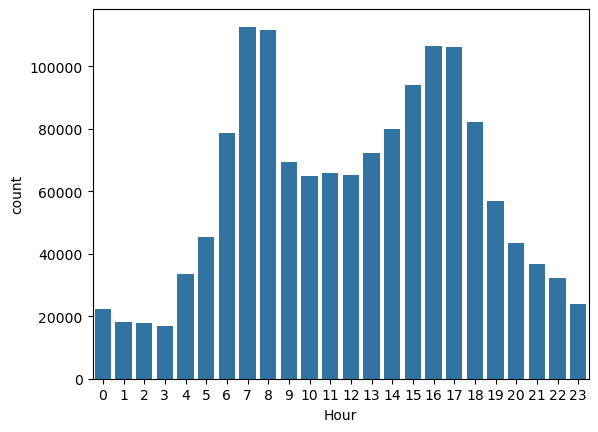

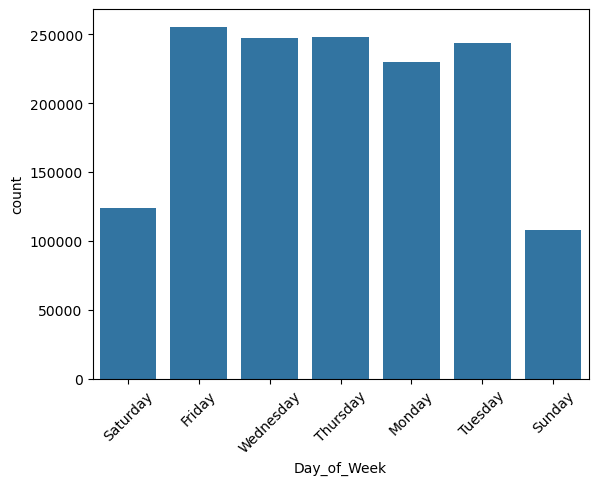

In [101]:
# Convert Start_Time to datetime
df_cleaned['Start_Time'] = pd.to_datetime(df_cleaned['Start_Time'], errors='coerce')
df_cleaned.dropna(subset=['Start_Time'], inplace=True)

# Determining accidents by the hour (Convert so that each time is in EST zone)
df_cleaned['Hour'] = df_cleaned['Start_Time'].dt.hour
sns.countplot(x='Hour', data=df_cleaned)
plt.show()

# Determining accidents by day of the week
df_cleaned['Day_of_Week'] = df_cleaned['Start_Time'].dt.day_name()
sns.countplot(x='Day_of_Week', data=df_cleaned)
plt.xticks(rotation=45)
plt.show()

Extracted Hour to understand if the time of the day was a factor. In the bar graph, we can see that there were hours that had more accidents occur then others. This shows that this could be a factor that could help the machine learning model.

For the Day_of_week, this may or may not be used in our machine learning method, but we thought that this would be an interesting feature to see.

/var/folders/tf/bq9kbjld3bnd3lfs7pjlt9hc0000gn/T/ipykernel_1344/2611235374.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df_cleaned, palette='viridis')


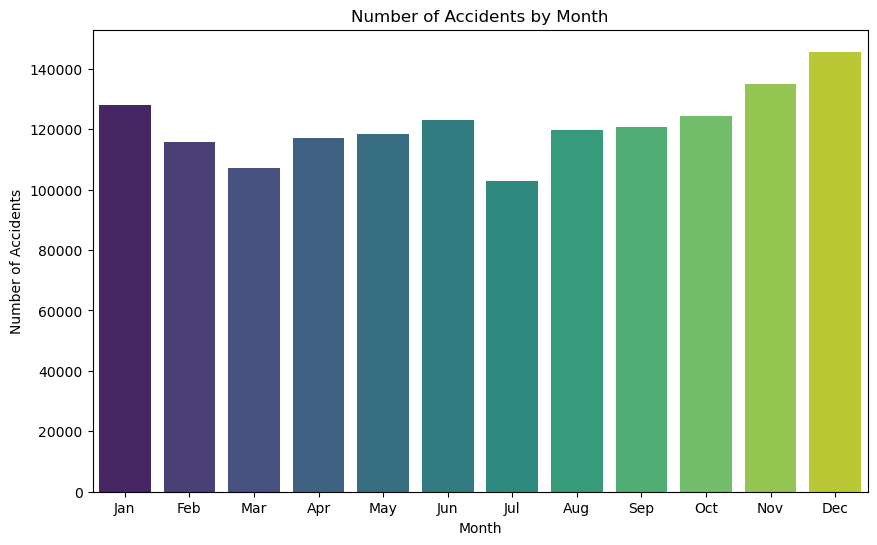

/var/folders/tf/bq9kbjld3bnd3lfs7pjlt9hc0000gn/T/ipykernel_1344/2611235374.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Is_Weekend', data=df_cleaned, palette='coolwarm')


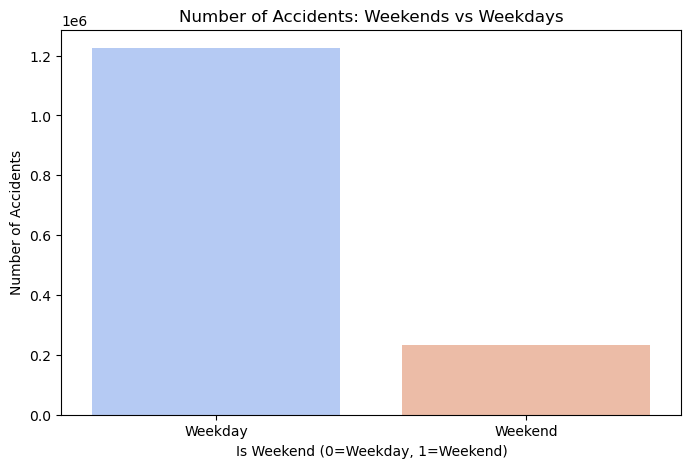

/var/folders/tf/bq9kbjld3bnd3lfs7pjlt9hc0000gn/T/ipykernel_1344/2611235374.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rush_Hour', data=df_cleaned, palette='magma')


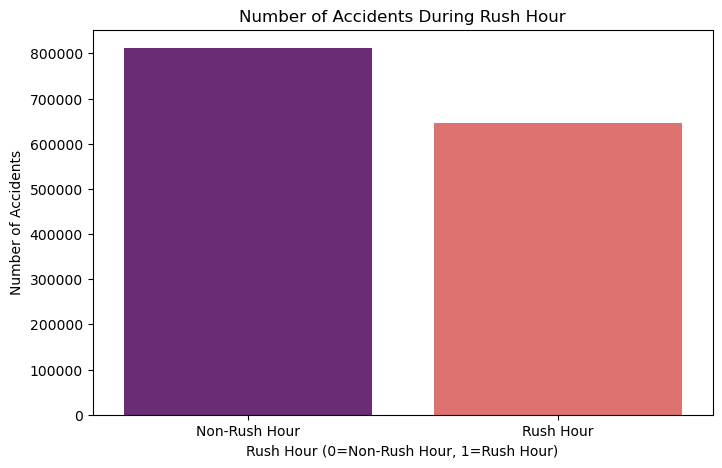

In [103]:
df_cleaned['Month'] = df_cleaned['Start_Time'].dt.month
df_cleaned['Is_Weekend'] = df_cleaned['Day_of_Week'].isin(['Saturday', 'Sunday']).astype(int)
df_cleaned['Rush_Hour'] = df_cleaned['Hour'].apply(lambda x: 1 if 7 <= x <= 9 or 16 <= x <= 19 else 0)

import matplotlib.pyplot as plt
import seaborn as sns

# Accidents by Month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df_cleaned, palette='viridis')
plt.title('Number of Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Accidents by Weekend or Weekday
plt.figure(figsize=(8, 5))
sns.countplot(x='Is_Weekend', data=df_cleaned, palette='coolwarm')
plt.title('Number of Accidents: Weekends vs Weekdays')
plt.xlabel('Is Weekend (0=Weekday, 1=Weekend)')
plt.ylabel('Number of Accidents')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

# Accidents during Rush Hour
plt.figure(figsize=(8, 5))
sns.countplot(x='Rush_Hour', data=df_cleaned, palette='magma')
plt.title('Number of Accidents During Rush Hour')
plt.xlabel('Rush Hour (0=Non-Rush Hour, 1=Rush Hour)')
plt.ylabel('Number of Accidents')
plt.xticks([0, 1], ['Non-Rush Hour', 'Rush Hour'])
plt.show()


We also engineered the "month" feature. Month is very important as the weather can sway the severity incidents. The winter and the icy conditions can cause many acciendents, or the months where people are travelling can be a factor too. In this case, we see that summer months have the highest accidents. The Is-Weekend is based off of the day_of_week. However, we won't be using day_of_week in the machine learning model, so we created a boolean 0,1 value. The rush hour is also based of the hours feature.

All of the steps involved in this feature extraction / feature learning component should be fully motivated and justified in markdown cells

# (d) Dataset Processing

Carry out the declared task on each dataset using two different machine learning methods, with the parameters for each method (where applicable) carefully tuned using cross-validation, the results averaged over multiple valida- tion folds, and the final results presented in an aesthetically pleasing manner. In addition, use markdown cells to justify different steps in your implementations and explain different aspects of the two methods as much as possible.

In [108]:
# Delete the original dataframe to freeup some space
del df

In [109]:
# Find columns with any NaN values
print(df_cleaned['Severity'])
columns_with_nan = df_cleaned['Severity'].isna().any()
print(columns_with_nan)
df_cleaned.dropna(inplace=True)
print(columns_with_nan)

0          1
1          1
2          1
3          1
4          1
          ..
1585418    4
1585419    4
1585420    4
1585421    4
1585422    4
Name: Severity, Length: 1457239, dtype: int64
False
False


In [110]:
# Split the original dataset (X, y) into training and testing sets with stratification
from sklearn.model_selection import train_test_split

# Features and target
X = df_cleaned.drop(columns=['Severity'])  # Features
y = df_cleaned['Severity']                # Target variable

# Perform 80/20 split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print initial stats
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Proportion of Severity levels in training set:\n{y_train.value_counts(normalize=True)}")
print(f"Proportion of Severity levels in test set:\n{y_test.value_counts(normalize=True)}")


Training set size: 1165791
Test set size: 291448
Proportion of Severity levels in training set:
Severity
2    0.559530
3    0.267477
4    0.126766
1    0.046227
Name: proportion, dtype: float64
Proportion of Severity levels in test set:
Severity
2    0.559530
3    0.267475
4    0.126767
1    0.046228
Name: proportion, dtype: float64


We split the original dataset into a training and testing set using **stratification**. The X represents the feature set of the dataset. It includes all the columns except Severity column which is dropped. The y represents the target variable, which is Severity and contains the class labels (Severity levels 1,2,3 and 4).

test_size = 0.2 : this means that 20% of the data is used for testing and 80% remaining is used for training.

random_state = 42 : This sets the random seed, ensuring that the split is reproducible. There is no speciail meaning for the seed but with a fixed number, it would make sure that every time we run the code, we are getting the same split of the dataset.

Stratification ensures that the proportion of the difference classes are the same in both the training and testing dataset. This would help when dealing with imbalanceed datasets to ensure that both the training and test sets contain a simular distribution of the Severity classes.

In [112]:
import pandas as pd

def one_hot_encode_top_values(df, columns, top_n):
    """One-hot encodes the top N values in multiple columns of a DataFrame."""

    for col in columns:
        # Get the top N values
        top_values = df[col].value_counts().nlargest(top_n).index

        # One-hot encode the top values
        dfEncoded =  pd.get_dummies(df, columns=[col], prefix=col)

        # Keep only the columns for the top values
        dfEncoded = dfEncoded[[c for c in dfEncoded.columns if c.startswith(col + "_") and c.split("_")[1] in top_values]]

        df = pd.concat([df.drop(col, axis=1), dfEncoded], axis=1)
    return df


In [113]:
#One hot encoding of categorical variables
from sklearn.preprocessing import OneHotEncoder

# Use pd.get_dummies() to one-hot encode the categorical columns
#categorical_columns = ['City', 'County', 'State', 'Airport_Code', 'Weather_Condition']
categorical_columns = ['Weather_Condition']

df_pandas_encoded = one_hot_encode_top_values(df_cleaned, categorical_columns, 25)

# Concatenate the one-hot encoded columns with the original DataFrame
df_cleaned = pd.concat([df_cleaned.drop(categorical_columns, axis=1), df_pandas_encoded], axis=1)

print(f"One-Hot Encoded Data using Scikit-Learn:\n{df_cleaned}\n")

One-Hot Encoded Data using Scikit-Learn:
         Severity          Start_Time             End_Time  Start_Lat  \
0               1 2016-08-27 11:17:06  2016-08-27 11:47:06  30.159246   
1               1 2022-07-15 04:37:38  2022-07-15 05:21:53  29.737736   
2               1 2022-09-02 07:49:38  2022-09-02 08:19:15  30.248840   
3               1 2022-05-18 08:28:48  2022-05-18 09:28:35  33.103882   
4               1 2020-04-30 13:18:22  2020-04-30 14:03:22  33.465850   
...           ...                 ...                  ...        ...   
1585418         4 2017-05-03 19:31:12  2017-05-04 02:31:12  28.547080   
1585419         4 2020-04-21 12:03:44  2020-04-21 12:30:53  37.858360   
1585420         4 2018-08-27 01:37:54  2018-08-27 02:07:21  47.577730   
1585421         4 2018-10-09 13:01:44  2018-10-09 13:31:10  33.803760   
1585422         4 2020-05-29 15:35:39  2020-05-29 16:10:37  38.873160   

          Start_Lng  Distance(mi)         City                County State  \
0   

We one-hot encoded "weather condition" as this is an important feature that can influence the severity of an accident. Since it was a categorical feature, we one-hot encoded.

In [115]:
X_train = X_train.drop(columns=['End_Time'])
X_test = X_test.drop(columns=['End_Time'])

X_train = X_train.drop(columns=['Sunrise_Sunset'])
X_test = X_test.drop(columns=['Sunrise_Sunset'])

X_train = X_train.drop(columns=['Civil_Twilight'])
X_test = X_test.drop(columns=['Civil_Twilight'])

X_train = X_train.drop(columns=['Nautical_Twilight'])
X_test = X_test.drop(columns=['Nautical_Twilight'])

X_train = X_train.drop(columns=['Astronomical_Twilight'])
X_test = X_test.drop(columns=['Astronomical_Twilight'])

X_train = X_train.drop(columns=['Wind_Direction'])
X_test = X_test.drop(columns=['Wind_Direction'])

X_train = X_train.drop(columns=['City', 'County', 'State', 'Airport_Code', 'Weather_Condition', 'Day_of_Week'])
X_test = X_test.drop(columns=['City', 'County', 'State', 'Airport_Code', 'Weather_Condition', 'Day_of_Week'])

X_train = X_train.drop(columns=['Start_Time'])
X_test = X_test.drop(columns=['Start_Time'])

print(X_train.dtypes)


Start_Lat          float64
Start_Lng          float64
Distance(mi)       float64
Temperature(F)     float64
Humidity(%)        float64
Pressure(in)       float64
Visibility(mi)     float64
Wind_Speed(mph)    float64
Amenity               bool
Bump                  bool
Crossing              bool
Give_Way              bool
Junction              bool
No_Exit               bool
Railway               bool
Roundabout            bool
Station               bool
Stop                  bool
Traffic_Calming       bool
Traffic_Signal        bool
Turning_Loop          bool
Hour                 int32
Month                int32
Is_Weekend           int64
Rush_Hour            int64
dtype: object


After doing some testing, I did some last minute drops to the features in both the training and testing data since the data had already been split by now. I had to do it for both because we need to make sure that the features in the training data and the same in the testing data.

In [117]:
#Functions to help with ROC plots for part (e)
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations

    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes

    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''

    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]

    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate

    return tpr, fpr

In [118]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a threshold for the predicion of the class.

    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.

    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [119]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).

    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()

    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

## (i) Machine Learning Method 1

In [121]:
# 1 Model - RANDOM FOREST
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import ADASYN

# Check class distribution before SMOTE
print("Original Class Distribution:", Counter(y_train))

# Apply SMOTE to oversample minority classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# ada = ADASYN(random_state=130)
# X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Balanced Class Distribution:", Counter(y_train))

# Train the Random Forest model on the balanced dataset
# dict_weights = {1:320, 2: 0.4, 3: 0.67, 4: 446}

dict_weights = {1:1, 2: 1, 3: 1, 4:1}


#rf_model = RandomForestClassifier(n_estimators = 1000, class_weight=dict_weights)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("\n### Evaluation on Test Set ###")
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Original Class Distribution: Counter({2: 652295, 3: 311822, 4: 147783, 1: 53891})
Balanced Class Distribution: Counter({2: 652295, 3: 311822, 4: 147783, 1: 53891})

### Evaluation on Test Set ###
Accuracy: 70.66%

Classification Report:
              precision    recall  f1-score   support

           1       0.52      0.77      0.62     13473
           2       0.83      0.69      0.75    163074
           3       0.66      0.72      0.69     77955
           4       0.53      0.72      0.61     36946

    accuracy                           0.71    291448
   macro avg       0.63      0.72      0.67    291448
weighted avg       0.73      0.71      0.71    291448



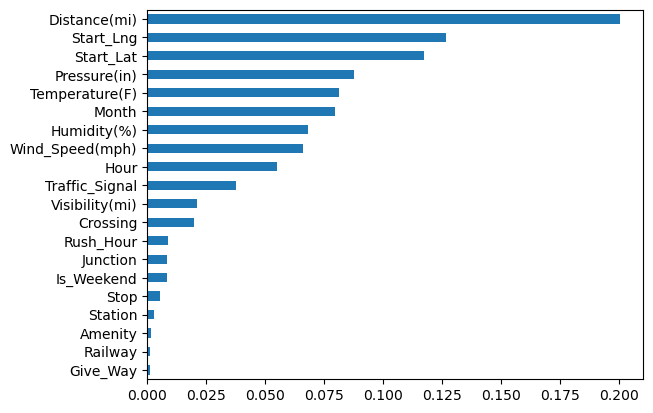

In [122]:
# Get feature importances
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()

## (ii) Machine Learning Method 2

In [124]:
#3 - Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#dict_weights = {1:320, 2: 0.4, 3: 0.67, 4:446}

# Apply SMOTE to oversample minority classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Create a decision tree classifier
#clf = DecisionTreeClassifier(class_weight=dict_weights)
clf = DecisionTreeClassifier()

# Train the classifier
#clf.fit(X_train, y_train)
clf.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_clf = clf.predict(X_test).round()

# Evaluate the model
print("\n### Evaluation on Test Set ###")
accuracy = accuracy_score(y_test, y_pred_clf)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_clf))



### Evaluation on Test Set ###
Accuracy: 64.69%

Classification Report:
              precision    recall  f1-score   support

           1       0.43      0.65      0.52     13473
           2       0.77      0.65      0.71    163074
           3       0.58      0.65      0.62     77955
           4       0.49      0.62      0.54     36946

    accuracy                           0.65    291448
   macro avg       0.57      0.64      0.60    291448
weighted avg       0.67      0.65      0.65    291448



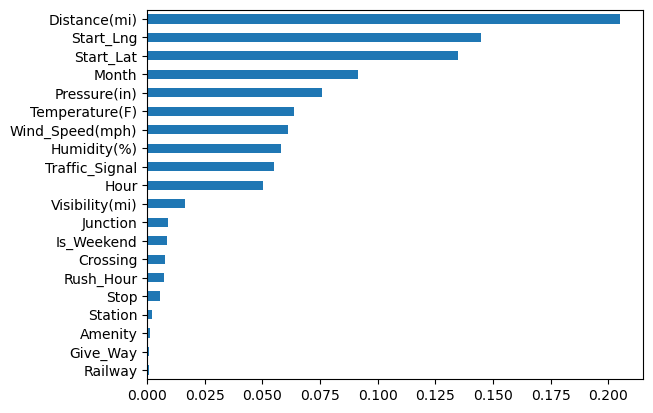

In [125]:
# Get feature importances
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()

# (e) Comparative Analysis of Two Methods

Provide a comparison between the two machine learning methods for each dataset across dimensions such as computational complexity,performance, etc., and a final recommendation on the method that should go into production for each dataset. This comparison should include both coding cells (e.g., overlayed plots, side-by-side confusion matrices, etc.) and markdown cells for discussion.

In [128]:
# Confusion matrix from the models Random forest and Decision classifiers
# Random forest
print("\nConfusion Matrix for random forest:")
print(confusion_matrix(y_test, y_pred_rf))

# Decision tree
print("\nConfusion Matrix for decision tree:")
print(confusion_matrix(y_test, y_pred_clf))


Confusion Matrix for random forest:
[[ 10307   1593   1386    187]
 [  7019 113158  25588  17309]
 [  2202  14135  55860   5758]
 [   227   8089   2019  26611]]

Confusion Matrix for decision tree:
[[  8817   2708   1724    224]
 [  7916 106162  30054  18942]
 [  3027  19158  50730   5040]
 [   523   9297   4291  22835]]


***Answer: (Look at the confusion matricies that are generated above)***

Comparing the two, we think that the **Random Forest Classifier** is the better option of the two machine learning methods. The reason we say this is through analyzing the two confusion matrix as well as the accuracy and classification report that we provided for each of the tasks.


1. **Computational Complexity**:

Decision Tree: the computation complexity is lower since it would train a single tree and it is faster to build and evaluate. The complexity for training would be O(m*n*log(n)) where m is the number of features and n is the number of data samples.

Random Forest: Computationally, it is more expensive as it builds multiple trees. The complexity for training is O(k*m*n *log(n)) where k is the number of trees in the forest. The predicion is slowers as it averages the result across multiple trees, but it does reduce the risk of overfitting compared to working with a single tree.

Computation Complexity (Efficiency) wise, the decision tree is better as it has a lower computation complexity and is faster.


2. **Performance**

Accuracy: Random Forest achieved an accuracy of 70.66% which outperformed Decision Tree's 64.69%. This is imporvement is due to the Random Forest's nature to reduce variance by aggregating multiple trees. The Random Forest outperforms Decision Tree across all the macro metrics, showing a better handling of the minority classes, which is Severity 1 and 4. Across the weighted average, random forest is more robust providing a better overall performance.

In the confusion matrix, the **Random Forest** has a higher recall for the minority classes (such as class 4 with 70% whereas decision tree is 60%). This means that Random Firest is better at correctly identifying the minority samples.

For this reason, we can say that Random Forest is the better model as it demonstrates superior accuracy, recall, and precision, making it more effective in this highly imbalanced dataset.


#### Random Forest Classifier - Model 1

Micro-averaged One-vs-Rest ROC AUC score:
0.92
Macro-averaged One-vs-Rest ROC AUC score:
0.90


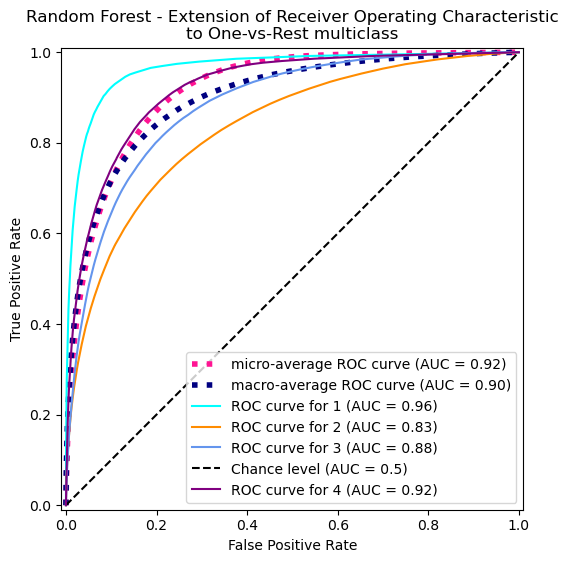

In [161]:
#Plot ROC for Random Forest Classifier (Model 1)
from itertools import cycle
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import RocCurveDisplay

#Get the details of number of samples, number of target classes
n_samples, n_features = X_train.shape
n_classes = len(np.unique(y_train))
target_names = list(rf_model.classes_)

#Calculate the probability score of the predicted classes
y_score_rf = rf_model.predict_proba(X_test)

#One hot encode labelling
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score_rf.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

# Plot an all-in-one micro and macro averaged ROC curve
fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

#Select unique colors for each class curve
colors = cycle(["aqua", "darkorange", "cornflowerblue", "purple"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score_rf[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
        plot_chance_level=(class_id == 2),
        
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Random Forest - Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)

#### Decision Tree Classifier - Model 2

Micro-averaged One-vs-Rest ROC AUC score:
0.77
Macro-averaged One-vs-Rest ROC AUC score:
0.75


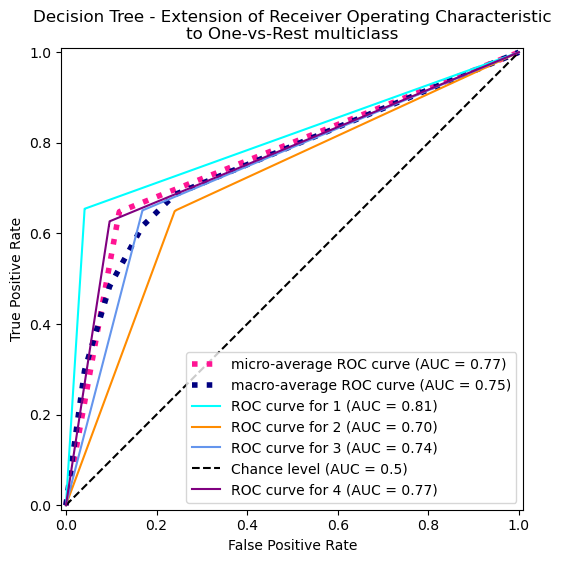

In [165]:
#Plot ROC for Decision Tree Classifier (Model 2)
from itertools import cycle
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import RocCurveDisplay

#Get the details of number of samples, number of target classes
n_samples, n_features = X_train.shape
n_classes = len(np.unique(y_train))
target_names = list(clf.classes_)

#Calculate the probability score of the predicted classes
y_score_clf = clf.predict_proba(X_test)

#One hot encode labelling
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score_clf.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score_clf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

# Plot an all-in-one micro and macro averaged ROC curve
fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

#Select unique colors for each class curve
colors = cycle(["aqua", "darkorange", "cornflowerblue", "purple"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score_clf[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
        plot_chance_level=(class_id == 2),
        
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Decision Tree - Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)

#### The above two plots are the ROC curves for the Random Forest Classifier (micro-average = 0.92) and the Decision Tree Classifier (micro-average = 0.77) respectively. As can be seen from the above, the area under the curve (AUC) for the Random Forest is better/larger (by 20% more) than the Decision Tree's AUC for every severity class (target classes). This is expected as the Random Forest classifier generally performs better than Decision Tree and especially well suited for imbalanced dataset, like ours. 

#### The AUC for class 2 in both is the lowest despite the class being the largest in the original dataset. This is because of the undersampling and SMOTE techniques that we applied in order to balance the classes. This is a trade-off that we had to compromise in order to obtain a better overall performance, f1-score, and other KPIs. 

# (f) Discussion on Ethical Issues

 Provide a discussion on the ethical aspects of the machine learning tasks that you carried out on the declared datasets. This discussion should be carried out in a markdown cell and should be carefully formatted for readability purposes.:

When working with machine learning lasts with sensitive data like US accidents, there are several ethical aspects that must be considered to ensure the responsible use the data. Some considerations could be:

1. **Bias and Fairness**: Since the dataset consists of both urban and rural regions, the data in one place could be the reason for the geographic region. For example, a rural location would have less accidents than an urban place due to the many cars that run in a place, the population, etc. If there is a lack of investment in regions for safety measures or there is less historical data, this could create a cycle where the underrepresented areas are ignored or there is bias in the dataset that makes one location worse than the other.

2. **Surveillance Concerns**: Using geographic and time stamped data for accidents and its predictions could contribute to surveillance practices. While the goal is to improve public safety, constant monitoring of individuals and areas might infringe on the people's right to move freely without being watched. Since accident predictions are ties to data grom GPA, license plate and traffic cameras, this is a valid ethical concern.

3. **Data Quality**: Accident data can come from various sources such as directly from the law enforcement, hospitals, insurance claims, etc. In that case, there is possibility for discrepancies in how the accidents are reported and in what severity is was reported as. Minor accidents may go unreported, which could skew the severity of the incidents. Areas with less reporting infrastructure such as rural or low-income areas may appear "safer" than it really is.


# (g) Bibliography

Provide bibliographic references that helped you during the preparation of the notebook. These references, which should be provided in a markdown cell at the end of the notebook, should be referenced within the body markdown cells of each notebook as much as possible.

[1] A. Krishnan, "A Random Forest Classifier with Imbalanced Data," Analytics Vidhya, Medium, Aug. 19, 2020. [Online]. Available: https://medium.com/analytics-vidhya/a-random-forest-classifier-with-imbalanced-data-7ef4d9ebedb8.

[2] "Bagging and Random Forest for Imbalanced Classification," GeeksforGeeks. [Online]. Available: https://www.geeksforgeeks.org/bagging-and-random-forest-for-imbalanced-classification/.

[3] F. M. C. Cardoso, J. M. C. da Costa, and A. B. Lopes, "A Systematic Review of Oversampling Methods for Imbalanced Learning: Techniques, Trends, Challenges, and Open Issues," Information, vol. 14, no. 1, p. 54, Jan. 2023. [Online]. Available: https://www.mdpi.com/2078-2489/14/1/54.

[4] "Decision Tree," GeeksforGeeks. [Online]. Available: https://www.geeksforgeeks.org/decision-tree/.

[5] 160shelf, "Decision Tree on Imbalanced Dataset," Medium, Jan. 24, 2023. [Online]. Available: https://medium.com/@160shelf/decision-tree-on-imbalanced-dataset-f1575414a6c2.

[6] "Difference Between Random Forest and Decision Tree," GeeksforGeeks. [Online]. Available: https://www.geeksforgeeks.org/difference-between-random-forest-and-decision-tree/.

# (h) Extra Code

Along with the two machine learning models that I have included above, I tried out a few when working with this dataset. The hard part of this dataset was that since it was **highly imbalanced**, I had to find a way to make the model be able to understand the underrepresentated data among the large portions in Severity class 2 and 3.

For that reason, below are some models that I tried out as well

In [ ]:
#1 Extra - Model k-fold stratified random forest and smote - !!!! BEST SO FAR IN TERMS OF CONFUSION MATRIX!!!! but takes a lot of time
'''import matplotlib.pyplot as plt
from statistics import mean
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
#from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

#Use SMOTE to oversample the minority class
oversample = SMOTE()
over_X, over_y = oversample.fit_resample(X_train, y_train)
over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.1, stratify=over_y)

#Build SMOTE SRF model
SMOTE_SRF = RandomForestClassifier(n_estimators=150, random_state=0)

#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision')
#Evaluate SMOTE SRF model
scores = cross_validate(SMOTE_SRF, over_X, over_y, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

#Randomly spilt dataset to test and train set
##X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
#Train SMOTE SRF
SMOTE_SRF.fit(over_X_train, over_y_train)
#SMOTE SRF prediction result
y_pred = SMOTE_SRF.predict(X_test)

# Evaluate the model
print("\n### Evaluation on Test Set ###")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#Create confusion matrix
#fig = plot_confusion_matrix(SMOTE_SRF, X_test, y_test, display_labels=['Sev 1', 'Sev 2', 'Sev 3', 'Sev 4'], cmap='Greens')
#plt.title('SMOTE + Standard Random Forest Confusion Matrix')
#plt.show() '''

In [ ]:
# Get feature importances
'''feat_importances = pd.Series(SMOTE_SRF.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis() '''

In [ ]:
#2 Extra - Model KNN - Low accuracy, so not considered
'''from sklearn.neighbors import KNeighborsRegressor

# Apply SMOTE to oversample minority classes
smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = knn_model.predict(X_test).round()

# Evaluate the model
print("\n### Evaluation on Test Set ###")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))'''

In [ ]:
#3 Extra - Model SVC, not considered due to extremely time consuming for large datasets
'''from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

#smote = SMOTE(sampling_strategy='auto')
#X_res, y_res = smote.fit_resample(X_train, y_train)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("\n### Evaluation on Test Set ###")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))'''